# Store US Stock Prices in HDF5 Format

## Imports

In [2]:
import pandas as pd
import csv
from datetime import datetime
import numpy as np

# importing the csv library
import csv
 
# opening the csv file by specifying
# the location
# with the variable name as csv_file
with open('WIKI_prices.csv') as csv_file:
 
    # creating an object of csv reader
    # with the delimiter as ,
    csv_reader = csv.reader(csv_file, delimiter = ',')
 
    # list to store the names of columns
    list_of_column_names = []
    i = 0
    # loop to iterate through the rows of csv
    for row in csv_reader:
 
        # adding the first row
        list_of_column_names.append(row)
        i += 1
        # breaking the loop after the
        # first iteration itself
        if i == 2:
            break
            
 
# printing the result
print(list_of_column_names[0])
print(list_of_column_names[1])

['ticker', 'date', 'open', 'high', 'low', 'close', 'volume', 'ex-dividend', 'split_ratio', 'adj_open', 'adj_high', 'adj_low', 'adj_close', 'adj_volume']
['A', '1999-11-18', '45.5', '50.0', '40.0', '44.0', '44739900.0', '0.0', '1.0', '31.041951216877', '34.112034304261', '27.289627443409', '30.018590187749', '44739900.0']


## Load source data

In [3]:
#Select stock price data only from 2,000 onwards.
#keep only the adjusted open, low, high, close and volume
#rename by removing the adj_ prefix
#convert the date column to datetime format
#set ticker and date as index
usecols = [0,1, 9,10,11,12,13]
names = ['ticker','date', 'open', 'high', 'low', 'close', 'volume']
dtypes={'ticker':str,'date':np.datetime64, 'open':np.float64, 'high':np.float64, 'low':np.float64, 'close':np.float64, 'volume':np.float64}
index_col = [0,1]
df = pd.read_csv('WIKI_prices.csv', usecols=usecols, header=0, names=names, parse_dates=[1], index_col=index_col)

## Apply required transformations

In [4]:
#convert the date column to datetime format
#set ticker and date as index
df.sort_index(level=0, inplace=True)
new_df = df.loc[df.index.get_level_values(1) > "2000-01-01"]

## Plot data

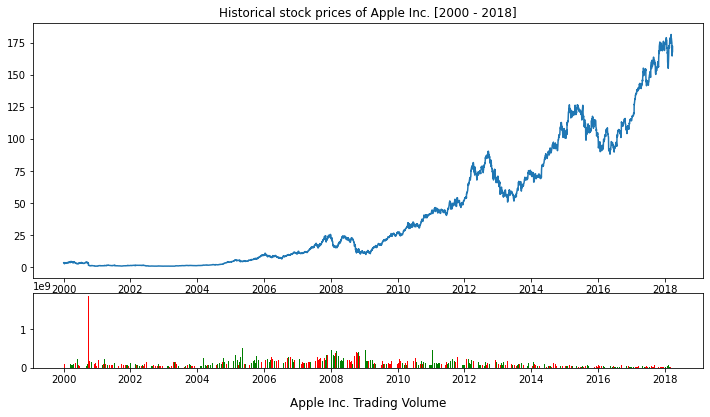

In [8]:
import matplotlib.pyplot as plt
stock_data = new_df.loc["AAPL"]
top_plt = plt.subplot2grid((5,4), (0, 0), rowspan=3, colspan=4)
top_plt.plot(stock_data.index, stock_data["close"])
plt.title('Historical stock prices of Apple Inc. [2000 - 2018]')
bottom_plt = plt.subplot2grid((5,4), (3,0), rowspan=1, colspan=4)
bottom_plt.bar(stock_data.index, stock_data['volume'], color=(stock_data['close'] - stock_data['open'] > 0).map({True: 'g',
                                                    False: 'r'}))
plt.title('Apple Inc. Trading Volume', y=-0.60)
plt.gcf().set_size_inches(12,8)

## Store in HDF5 format

In [11]:
new_df.to_hdf('Wiki.h5', 'wiki')

In [12]:
pd.read_hdf("Wiki.h5", 'wiki')

open       high        low      close     volume
ticker date                                                             
A      2000-01-03  53.726454  53.856080  45.969377  49.121329  3343600.0
       2000-01-04  46.481058  46.992738  44.175084  45.369006  3408500.0
       2000-01-05  45.198445  45.239380  41.828176  41.998737  4119200.0
       2000-01-06  42.046493  42.298923  39.658651  40.934441  1812900.0
       2000-01-07  40.293135  44.986951  40.252200  44.345645  2016900.0
...                      ...        ...        ...        ...        ...
ZUMZ   2018-03-21  23.800000  24.600000  23.605800  23.950000   354092.0
       2018-03-22  23.900000  24.350000  23.300000  23.350000   269607.0
       2018-03-23  23.550000  24.200000  23.450000  23.550000   301584.0
       2018-03-26  23.750000  24.800000  23.700000  24.650000   375320.0
       2018-03-27  24.650000  24.650000  23.350000  23.600000   403884.0

[11343920 rows x 5 columns]